<a href="https://colab.research.google.com/github/harshu722/AI-Chatbot-Depd-/blob/main/Rain_Prediction_of_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install opendatasets --upgrade --quiet


In [2]:
import opendatasets as od
od.version()

'0.1.22'

In [6]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kollurusaharsh
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 173MB/s]

In [7]:
import os
data_dir = './weather-dataset-rattle-package'
os.listdir(data_dir)


['weatherAUS.csv']

In [8]:
train_csv = data_dir + '/weatherAUS.csv'

In [9]:
import pandas as pd
data = pd.read_csv(train_csv)
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [10]:
import pandas as pd
data = pd.read_csv(train_csv)
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [11]:
data.shape

(145460, 23)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [14]:
data.dropna(subset=["RainToday", "RainTomorrow"], inplace=True)

In [15]:
data.shape

(140787, 23)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

In [17]:
data.describe()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   
50%        12.000000      22.60000       0.000000      4.800000      8.500000   
75%        16.800000      28.30000       0.800000      7.400000     10.700000   
max        33.900000      48.10000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   
50%        52.000000    1017.600000    1015.200000      5.000000   
75%        66.000000    1022.400000    1020.000000      7.000000   
max       100.000000    1041.000000    1039.600000      9.000000   

           Cloud3pm        Temp9am        Temp3pm  
count  84693.000000  140131.000000  138163.000000  
mean       4.499250      16.987066      21.693183  
std        2.719752       6.496012       6.937784  
min        0.000000      -7.200000      -5.400000  
25%        2.000000      12.300000      16.600000  
50%        5.000000      16.700000      21.100000  
75%        7.000000      21.600000      26.400000  
max        9.000000      40.200000      46.700000

In [21]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [22]:
data["Location"].nunique()

49

In [23]:
px.histogram(data, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [24]:
px.histogram(data,
             x = 'Temp9am',
             title = 'Temperature at 9 am vs. Rain Tomorrow',
             color = 'RainTomorrow')


In [25]:
px.histogram(data,
             x = 'Temp3pm',
             title = 'Temperature at 3 pm vs. Rain Tomorrow',
             color = 'RainTomorrow')

**Min Temp vs Max Temp**

In [26]:
px.scatter(data.sample(2000),
           title='Min Temp. vs Max Temp.',
           x='MinTemp',
           y='MaxTemp',
           color='RainToday')

In [27]:
px.scatter(data.sample(2000),
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

In [28]:
px.histogram(data,
             x='RainTomorrow',
             color='RainToday',
             title='Rain Tomorrow vs. Rain Today')

In [29]:
use_sample = True # False
sample_fraction = 0.1

if use_sample:
    data = data.sample(frac = sample_fraction).copy()


In [30]:
from sklearn.model_selection import train_test_split


In [31]:
train_val_df, test_df = train_test_split(data, test_size= 0.2, random_state= 42)
train_df, val_df = train_test_split(train_val_df, test_size= 0.25, random_state= 42)


In [32]:
print("train_df.shape", train_df.shape)
print("val_df.shape", val_df.shape)
print("test_df.shape", test_df.shape)


train_df.shape (8447, 23)
val_df.shape (2816, 23)
test_df.shape (2816, 23)


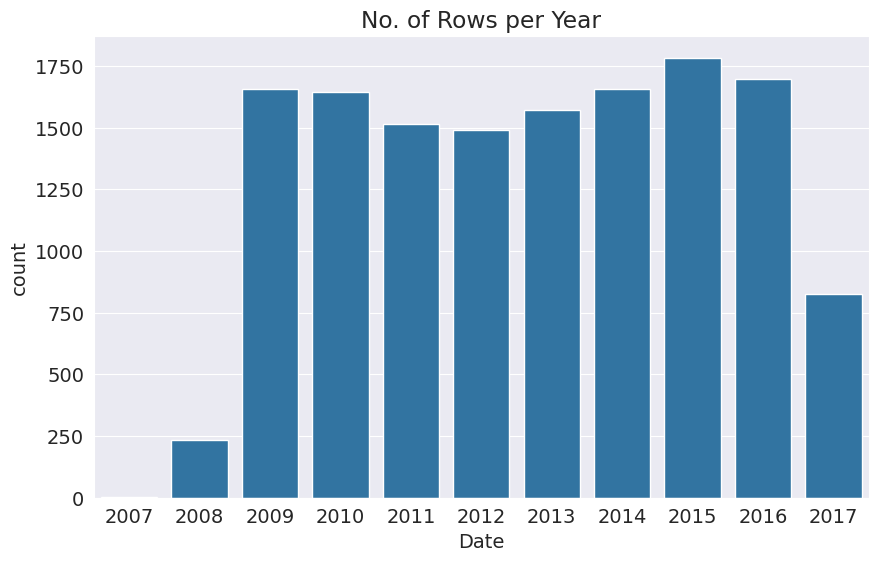

In [33]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(data.Date).dt.year);


In [34]:
year = pd.to_datetime(data.Date).dt.year

train_df = data[year < 2015]
val_df = data[year == 2015]
test_df = data[year > 2015]

In [35]:
val_df


Date          Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
141742  2015-12-12            Darwin     25.2     33.5      13.2          8.2   
86519   2015-08-15          Brisbane      8.0     22.6       0.0          4.0   
89355   2015-01-23            Cairns     25.1     32.1       0.0          6.0   
132279  2015-06-05            Hobart      1.3     12.4       0.0          0.4   
135405  2015-08-30        Launceston      5.0     12.7       0.0          NaN   
...            ...               ...      ...      ...       ...          ...   
66598   2015-11-02  MelbourneAirport     12.5     15.5       0.2          4.0   
17347   2015-05-19         Newcastle     12.0      NaN       0.1          NaN   
29486   2015-08-06          Richmond     -0.2     17.3       0.0          1.0   
54388   2015-07-13       MountGinini     -4.6     -0.2       6.8          NaN   
32924   2015-11-08            Sydney     16.2     21.7       0.4          7.2   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
141742       6.7          NW           41.0        WNW  ...        73.0   
86519        9.1         ENE           20.0         SW  ...        62.0   
89355        9.3         SSE           39.0          W  ...        63.0   
132279       7.4         NNW           61.0        NNW  ...        80.0   
135405       NaN          SE           46.0         SE  ...        69.0   
...          ...         ...            ...        ...  ...         ...   
66598        0.1         SSW           37.0         SW  ...        81.0   
17347        NaN         NaN            NaN        NaN  ...        99.0   
29486        NaN           S           41.0         NE  ...        66.0   
54388        NaN          SW           63.0        WSW  ...        98.0   
32924        4.6         SSW           46.0        SSW  ...        67.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
141742         65.0       1010.5       1006.4       7.0       7.0     30.5   
86519          56.0       1028.1       1025.1       4.0       2.0     13.4   
89355          74.0       1004.9       1002.2       5.0       5.0     30.8   
132279         55.0       1020.1       1018.3       1.0       7.0      4.0   
135405         50.0          NaN          NaN       NaN       NaN      8.7   
...             ...          ...          ...       ...       ...      ...   
66598          76.0       1012.6       1015.3       8.0       8.0     14.8   
17347          57.0          NaN          NaN       8.0       5.0     13.9   
29486          33.0       1016.9       1016.3       NaN       2.0      9.5   
54388          98.0          NaN          NaN       NaN       NaN     -1.5   
32924          65.0       1020.7       1020.0       7.0       6.0     18.0   

        Temp3pm  RainToday  RainTomorrow  
141742     32.0        Yes            No  
86519      19.9         No            No  
89355      30.4         No            No  
132279     10.9         No            No  
135405     12.2         No            No  
...         ...        ...           ...  
66598      14.2         No            No  
17347      19.2         No            No  
29486      16.7         No            No  
54388      -0.4        Yes           Yes  
32924      20.4         No            No  

[1783 rows x 23 columns]

In [36]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (9777, 23)
val_df.shape : (1783, 23)
test_df.shape : (2519, 23)


In [37]:
input_cols = list(train_df.columns)[1:-1]
print("Input Columns: ", input_cols)

target_col = 'RainTomorrow'
print("Target Column: ", target_col)

Input Columns:  ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
Target Column:  RainTomorrow


In [38]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [39]:
train_inputs


Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
76883           Portland      8.9     14.6       9.2          0.4       5.4   
133449        Launceston     13.9     25.6       0.0          NaN       NaN   
37020         WaggaWagga      6.2     17.6       0.0          0.6       7.3   
88012             Cairns     23.9     32.3       2.0          5.4      10.9   
94570         Townsville     20.8     25.7       0.2          1.6       2.4   
...                  ...      ...      ...       ...          ...       ...   
81544           Dartmoor      6.4     12.9      23.2          0.2       4.5   
54090        MountGinini     -4.8      6.4       0.2          NaN       NaN   
104018         Nuriootpa      9.5     21.7       0.0          4.0      10.8   
140269            Darwin     23.9     32.1       0.0          7.4       9.3   
65671   MelbourneAirport      8.4     16.2       1.8          2.4      10.7   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
76883            W           48.0        WSW        WSW  ...          24.0   
133449         SSE           39.0        SSE        ESE  ...           7.0   
37020           SW           30.0        ENE        WSW  ...          13.0   
88012          ENE           31.0         SE         NE  ...          20.0   
94570          ENE           20.0         SW        ENE  ...          15.0   
...            ...            ...        ...        ...  ...           ...   
81544           SW           30.0        WNW        WSW  ...          11.0   
54090          WSW           61.0        SSW        WSW  ...          17.0   
104018         ENE           33.0        ENE        ESE  ...          13.0   
140269          NW           31.0        WSW         NW  ...          26.0   
65671          SSE           54.0        SSE        SSE  ...          35.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
76883          76.0         76.0       1018.6       1020.6       7.0   
133449         31.0         22.0       1006.5       1010.7       NaN   
37020          84.0         57.0       1024.7       1022.0       2.0   
88012          75.0         65.0       1009.4       1005.5       4.0   
94570          90.0         77.0       1016.3       1013.0       7.0   
...             ...          ...          ...          ...       ...   
81544          99.0         95.0       1023.4       1022.5       NaN   
54090          94.0         54.0          NaN          NaN       NaN   
104018         61.0         31.0       1027.8       1025.4       3.0   
140269         74.0         58.0       1012.2       1007.9       6.0   
65671          48.0         46.0       1026.3       1024.7       1.0   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
76883        8.0     13.1     13.9        Yes  
133449       NaN     19.5     24.1         No  
37020        3.0     11.3     16.3         No  
88012        3.0     27.4     30.7        Yes  
94570        7.0     21.9     25.2         No  
...          ...      ...      ...        ...  
81544        NaN      7.9     11.5        Yes  
54090        NaN     -0.7      3.2         No  
104018       4.0     12.2     20.4         No  
140269       1.0     28.2     31.3         No  
65671        5.0     12.6     14.5        Yes  

[9777 rows x 21 columns]

In [40]:
train_targets


76883     Yes
133449     No
37020      No
88012      No
94570     Yes
         ... 
81544     Yes
54090      No
104018     No
140269     No
65671      No
Name: RainTomorrow, Length: 9777, dtype: object

In [41]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()


In [42]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()


In [43]:
import numpy as np


In [44]:
train_inputs.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9777 entries, 76883 to 65671
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       9777 non-null   object 
 1   MinTemp        9738 non-null   float64
 2   MaxTemp        9761 non-null   float64
 3   Rainfall       9777 non-null   float64
 4   Evaporation    6200 non-null   float64
 5   Sunshine       5837 non-null   float64
 6   WindGustDir    9071 non-null   object 
 7   WindGustSpeed  9074 non-null   float64
 8   WindDir9am     9057 non-null   object 
 9   WindDir3pm     9574 non-null   object 
 10  WindSpeed9am   9689 non-null   float64
 11  WindSpeed3pm   9671 non-null   float64
 12  Humidity9am    9681 non-null   float64
 13  Humidity3pm    9682 non-null   float64
 14  Pressure9am    8865 non-null   float64
 15  Pressure3pm    8870 non-null   float64
 16  Cloud9am       6364 non-null   float64
 17  Cloud3pm       6256 non-null   float64
 18  Tem

In [45]:
# select_dtypes method specifying that only the numeric columns are selected
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

# select_dtypes method specifying that only the object columns are selected
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [46]:
train_inputs[numeric_cols].describe()


MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  9738.000000  9761.000000  9777.000000  6200.000000  5837.000000   
mean     12.031464    23.102326     2.310647     5.253855     7.586860   
std       6.373004     6.990160     8.218220     3.747532     3.837637   
min      -6.800000    -1.700000     0.000000     0.000000     0.000000   
25%       7.400000    18.000000     0.000000     2.600000     4.700000   
50%      11.800000    22.500000     0.000000     4.600000     8.500000   
75%      16.600000    27.900000     0.600000     7.200000    10.700000   
max      31.400000    46.800000   236.800000    59.000000    14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    9074.000000   9689.000000   9671.000000  9681.000000  9682.000000   
mean       40.195173     14.066777     18.800848    68.452433    51.518385   
std        13.680412      9.058484      8.885602    19.160060    20.929010   
min         7.000000      0.000000      0.000000     3.000000     1.000000   
25%        31.000000      7.000000     13.000000    57.000000    37.000000   
50%        39.000000     13.000000     19.000000    69.000000    52.000000   
75%        48.000000     20.000000     24.000000    83.000000    66.000000   
max       120.000000     83.000000     83.000000   100.000000   100.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8865.000000  8870.000000  6364.000000  6256.000000  9721.000000   
mean   1017.539729  1015.109521     4.262728     4.400416    16.891688   
std       7.078347     7.040306     2.877528     2.707244     6.449519   
min     985.000000   980.200000     0.000000     0.000000    -5.500000   
25%    1012.900000  1010.300000     1.000000     2.000000    12.200000   
50%    1017.500000  1015.100000     5.000000     5.000000    16.700000   
75%    1022.400000  1019.900000     7.000000     7.000000    21.400000   
max    1041.000000  1037.300000     8.000000     8.000000    39.000000   

           Temp3pm  
count  9723.000000  
mean     21.591525  
std       6.847204  
min      -3.000000  
25%      16.700000  
50%      21.000000  
75%      26.200000  
max      45.800000

In [47]:
data[numeric_cols].isnull().sum()


MinTemp            53
MaxTemp            27
Rainfall            0
Evaporation      5919
Sunshine         6645
WindGustSpeed     939
WindSpeed9am      108
WindSpeed3pm      243
Humidity9am       137
Humidity3pm       319
Pressure9am      1399
Pressure3pm      1396
Cloud9am         5173
Cloud3pm         5511
Temp9am            63
Temp3pm           246
dtype: int64

In [48]:
train_inputs[numeric_cols].isna().sum()


MinTemp            39
MaxTemp            16
Rainfall            0
Evaporation      3577
Sunshine         3940
WindGustSpeed     703
WindSpeed9am       88
WindSpeed3pm      106
Humidity9am        96
Humidity3pm        95
Pressure9am       912
Pressure3pm       907
Cloud9am         3413
Cloud3pm         3521
Temp9am            56
Temp3pm            54
dtype: int64

In [49]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "mean")

In [50]:
imputer.fit(data[numeric_cols])


SimpleImputer()

In [51]:
list(imputer.statistics_)


[12.175096249821761,
 23.25332337033874,
 2.2667945166560126,
 5.457169117647059,
 7.596959913909066,
 39.93767123287671,
 14.001932574618854,
 18.636816999132698,
 68.74860134844356,
 51.60494186046512,
 1017.6446608832808,
 1015.2284597492707,
 4.430047159218504,
 4.507002801120448,
 16.99477026255708,
 21.692951637388852]

In [52]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [53]:
train_inputs[numeric_cols].isnull().sum()


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [54]:
train_inputs[numeric_cols].describe()


MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  9777.000000  9777.000000  9777.000000  9777.000000  9777.000000   
mean     12.032037    23.102573     2.310647     5.328239     7.590930   
std       6.360286     6.984440     8.218220     2.985791     2.965115   
min      -6.800000    -1.700000     0.000000     0.000000     0.000000   
25%       7.500000    18.000000     0.000000     3.800000     7.400000   
50%      11.800000    22.500000     0.000000     5.457169     7.596960   
75%      16.600000    27.900000     0.600000     5.600000     9.300000   
max      31.400000    46.800000   236.800000    59.000000    14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    9777.000000   9777.000000   9777.000000  9777.000000  9777.000000   
mean       40.176658     14.066193     18.799070    68.455341    51.519226   
std        13.179520      9.017623      8.837314    19.065774    20.827073   
min         7.000000      0.000000      0.000000     3.000000     1.000000   
25%        31.000000      7.000000     13.000000    57.000000    37.000000   
50%        39.000000     13.000000     19.000000    69.000000    52.000000   
75%        48.000000     19.000000     24.000000    82.000000    66.000000   
max       120.000000     83.000000     83.000000   100.000000   100.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  9777.000000  9777.000000  9777.000000  9777.000000  9777.000000   
mean   1017.549517  1015.120555     4.321136     4.438801    16.892279   
std       6.740166     6.705853     2.322877     2.166116     6.431025   
min     985.000000   980.200000     0.000000     0.000000    -5.500000   
25%    1013.300000  1010.800000     3.000000     3.000000    12.300000   
50%    1017.644661  1015.228460     4.430047     4.507003    16.700000   
75%    1021.800000  1019.300000     6.000000     6.000000    21.300000   
max    1041.000000  1037.300000     8.000000     8.000000    39.000000   

           Temp3pm  
count  9777.000000  
mean     21.592085  
std       6.828271  
min      -3.000000  
25%      16.700000  
50%      21.000000  
75%      26.200000  
max      45.800000

In [55]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


scaler.fit(data[numeric_cols])

MinMaxScaler()

In [56]:
print("Numeric Columns: ", numeric_cols)

print("Minimum: ", list(scaler.data_min_))

print("Maximum: ", list(scaler.data_max_))

Numeric Columns:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Minimum:  [-6.8, -3.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 3.0, 1.0, 983.9, 978.2, 0.0, 0.0, -5.5, -4.2]
Maximum:  [31.4, 46.8, 236.8, 145.0, 14.3, 120.0, 83.0, 83.0, 100.0, 100.0, 1041.0, 1037.3, 8.0, 8.0, 39.0, 45.8]


In [57]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [58]:
train_inputs[numeric_cols].describe()


MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  9777.000000  9777.000000  9777.000000  9777.000000  9777.000000   
mean      0.492985     0.524148     0.009758     0.036746     0.530834   
std       0.166500     0.140250     0.034705     0.020592     0.207351   
min       0.000000     0.026104     0.000000     0.000000     0.000000   
25%       0.374346     0.421687     0.000000     0.026207     0.517483   
50%       0.486911     0.512048     0.000000     0.037636     0.531256   
75%       0.612565     0.620482     0.002534     0.038621     0.650350   
max       1.000000     1.000000     1.000000     0.406897     1.000000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    9777.000000   9777.000000   9777.000000  9777.000000  9777.000000   
mean        0.293599      0.169472      0.226495     0.674797     0.510295   
std         0.116633      0.108646      0.106474     0.196554     0.210374   
min         0.000000      0.000000      0.000000     0.000000     0.000000   
25%         0.212389      0.084337      0.156627     0.556701     0.363636   
50%         0.283186      0.156627      0.228916     0.680412     0.515152   
75%         0.362832      0.228916      0.289157     0.814433     0.656566   
max         1.000000      1.000000      1.000000     1.000000     1.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  9777.000000  9777.000000  9777.000000  9777.000000  9777.000000   
mean      0.589309     0.624713     0.540142     0.554850     0.503197   
std       0.118041     0.113466     0.290360     0.270764     0.144517   
min       0.019264     0.033841     0.000000     0.000000     0.000000   
25%       0.514886     0.551607     0.375000     0.375000     0.400000   
50%       0.590975     0.626539     0.553756     0.563375     0.498876   
75%       0.663748     0.695431     0.750000     0.750000     0.602247   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Temp3pm  
count  9777.000000  
mean      0.515842  
std       0.136565  
min       0.024000  
25%       0.418000  
50%       0.504000  
75%       0.608000  
max       1.000000

In [59]:
train_inputs[categorical_cols].nunique()


Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [60]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

In [61]:
encoder.fit(data[categorical_cols])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [62]:
encoder.categories_


[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [63]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [64]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])


<ipython-input-64-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-64-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-64-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-64-8950d7c1751d>:1: PerformanceWarning:

Da

In [65]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
36265   SydneyAirport  0.463351  0.546185  0.000000     0.075862  0.769231   
86973        Brisbane  0.696335  0.698795  0.000000     0.051034  0.650350   
74693            Nhil  0.384817  0.331325  0.000845     0.037636  0.531256   
42399     Williamtown  0.675393  0.634538  0.000000     0.037636  0.531256   
120225   PerthAirport  0.272251  0.479920  0.000000     0.020690  0.622378   
...               ...       ...       ...       ...          ...       ...   
2524           Albury  0.662304  0.576305  0.081926     0.037636  0.531256   
57659        Ballarat  0.505236  0.572289  0.000000     0.037636  0.531256   
99465        Adelaide  0.358639  0.439759  0.000000     0.037636  0.531256   
24063   NorfolkIsland  0.625654  0.506024  0.020270     0.037636  0.531256   
11595    CoffsHarbour  0.712042  0.622490  0.000000     0.037636  0.531256   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SE  \
36265          WNW       0.557522          W          W  ...            0.0   
86973          NNE       0.168142         NW         NE  ...            0.0   
74693          ESE       0.203540         SE          S  ...            0.0   
42399          SSE       0.212389        SSW        SSE  ...            0.0   
120225         SSE       0.203540          N          S  ...            0.0   
...            ...            ...        ...        ...  ...            ...   
2524             W       0.265487        ESE          E  ...            0.0   
57659           SE       0.327434         SE         SE  ...            1.0   
99465           SW       0.115044        NNE        WSW  ...            0.0   
24063            E       0.362832          E          E  ...            0.0   
11595          NNE       0.230088          W         NE  ...            0.0   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
36265              0.0             0.0            0.0           1.0   
86973              0.0             0.0            0.0           0.0   
74693              0.0             0.0            0.0           0.0   
42399              1.0             0.0            0.0           0.0   
120225             0.0             0.0            0.0           0.0   
...                ...             ...            ...           ...   
2524               0.0             0.0            0.0           0.0   
57659              0.0             0.0            0.0           0.0   
99465              0.0             0.0            0.0           0.0   
24063              0.0             0.0            0.0           0.0   
11595              0.0             0.0            0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  \
36265              0.0             0.0             0.0           1.0   
86973              0.0             0.0             0.0           1.0   
74693              0.0             0.0             0.0           1.0   
42399              0.0             0.0             0.0           1.0   
120225             0.0             0.0             0.0           1.0   
...                ...             ...             ...           ...   
2524               0.0             0.0             0.0           0.0   
57659              0.0             0.0             0.0           1.0   
99465              0.0             1.0             0.0           1.0   
24063              0.0             0.0             0.0           0.0   
11595              0.0             0.0             0.0           1.0   

        RainToday_Yes  
36265             0.0  
86973             0.0  
74693             0.0  
42399             0.0  
120225            0.0  
...               ...  
2524              1.0  
57659             0.0  
99465             0.0  
24063             1.0  
11595             0.0  

[2519 rows x 123 columns]

In [66]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (9777, 123)
train_targets: (9777,)
val_inputs: (1783, 123)
val_targets: (1783,)
test_inputs: (2519, 123)
test_targets: (2519,)


In [67]:
! pip install pyarrow --quiet


In [68]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs. to_parquet("val_inputs.parquet")
test_inputs.to_parquet("test_inputs.parquet")

In [69]:
pd.DataFrame(train_targets).to_parquet("train_targets.parquet")
pd.DataFrame(val_targets).to_parquet("val_targets.parquet")
pd.DataFrame(test_targets).to_parquet("test_targets.parquet")

In [70]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')


train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 124 ms, sys: 31.1 ms, total: 155 ms
Wall time: 321 ms


In [71]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (9777, 123)
train_targets: (9777,)
val_inputs: (1783, 123)
val_targets: (1783,)
test_inputs: (2519, 123)
test_targets: (2519,)


In [72]:
val_targets


141742     No
86519      No
89355      No
132279     No
135405     No
         ... 
66598      No
17347      No
29486      No
54388     Yes
32924      No
Name: RainTomorrow, Length: 1783, dtype: object

In [73]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")


In [74]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)


LogisticRegression(solver='liblinear')

In [75]:
print(numeric_cols+encoded_cols)
print(model.coef_.tolist())


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [76]:
wt_df = pd.DataFrame({
    "Features" : (numeric_cols + encoded_cols),
    "Weights" : model.coef_.tolist()[0]
})

<Axes: xlabel='Weights', ylabel='Features'>

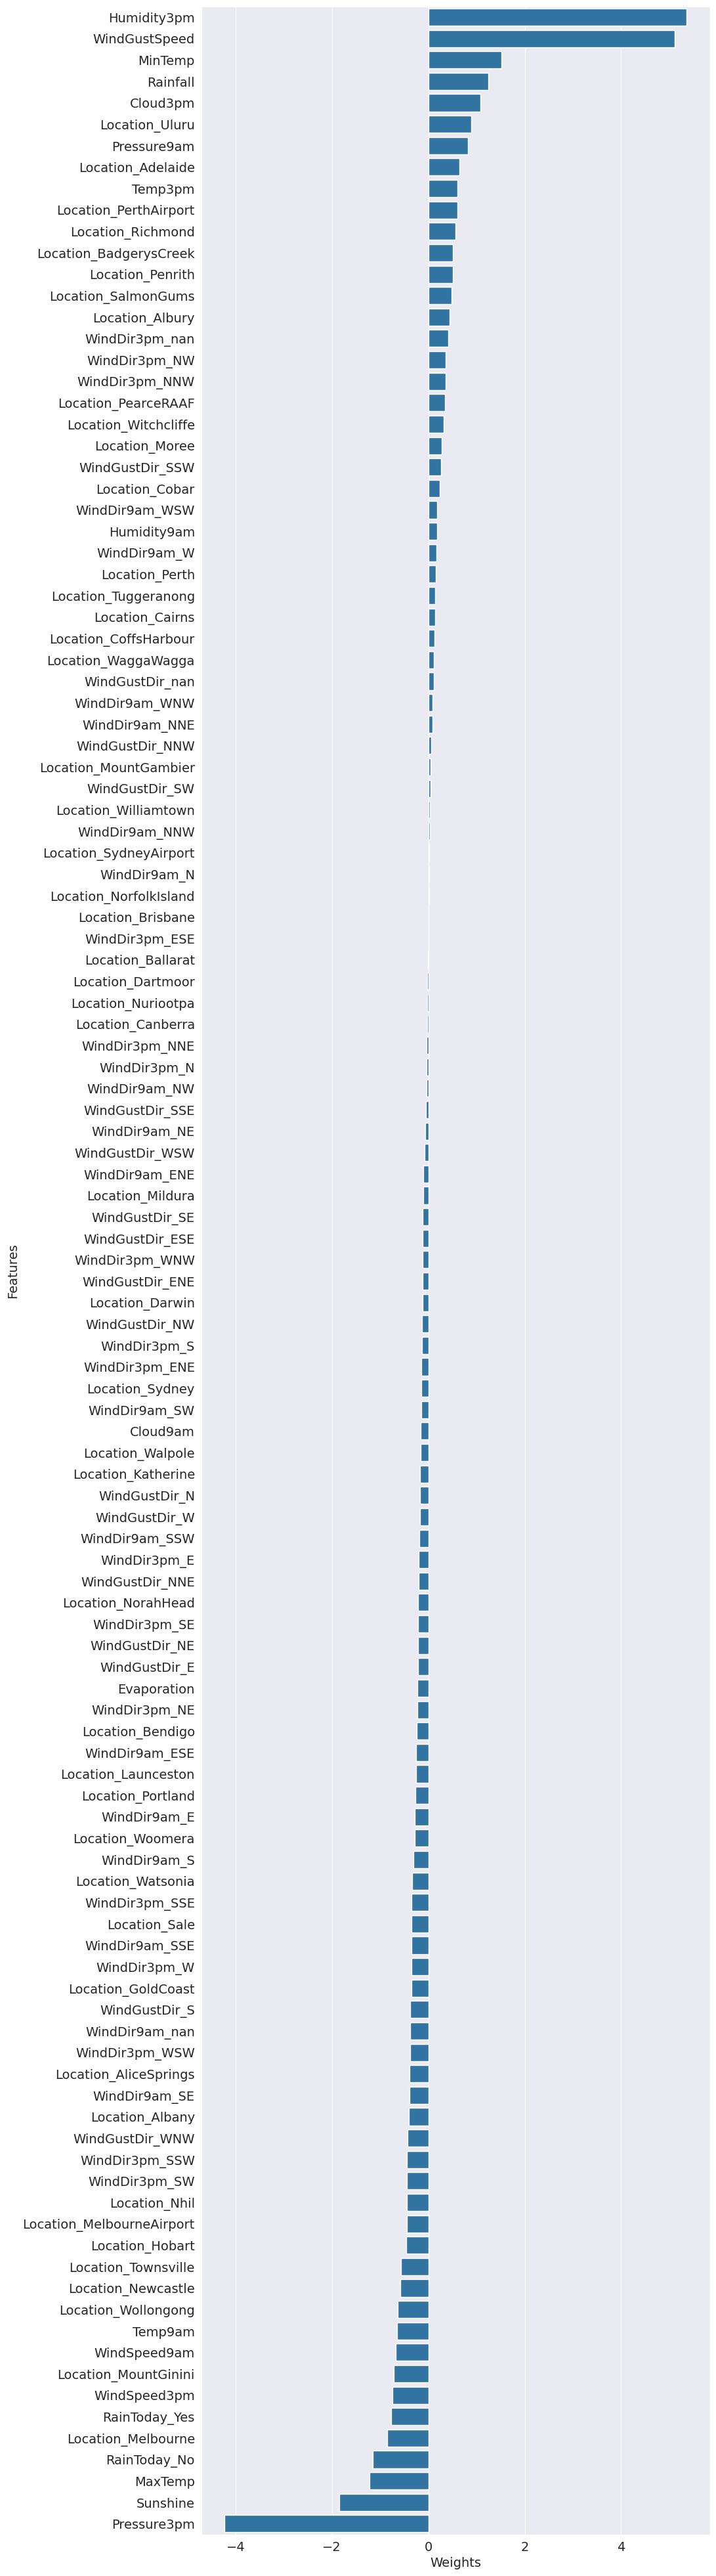

In [77]:
plt.figure(figsize=(10, 50))
sns.barplot(data = wt_df.sort_values("Weights", ascending=False), x= "Weights", y = "Features")


In [78]:
print(model.intercept_)


[-1.92650522]


In [79]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [80]:
train_preds = model.predict(X_train)
train_preds

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [81]:
train_probability = model.predict_proba(X_train)
train_probability


array([[0.46605866, 0.53394134],
       [0.97487114, 0.02512886],
       [0.92170265, 0.07829735],
       ...,
       [0.98589673, 0.01410327],
       [0.80610006, 0.19389994],
       [0.95796932, 0.04203068]])

In [82]:
model.classes_


array(['No', 'Yes'], dtype=object)

In [83]:
from sklearn.metrics import accuracy_score

accuracy_score(train_targets, train_preds)

0.8494425692952848

In [84]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_targets, train_preds, normalize= "true")

array([[0.94376819, 0.05623181],
       [0.47183416, 0.52816584]])

In [85]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 84.94%


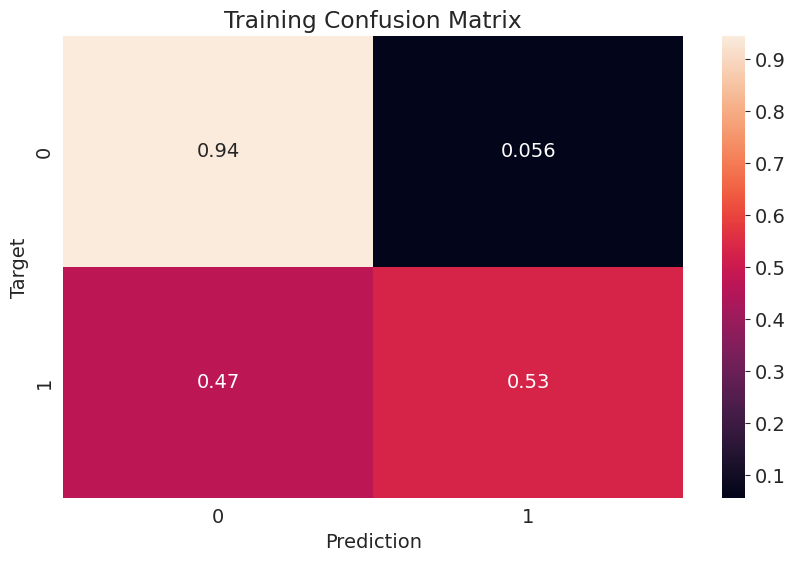

In [86]:
train_preds = predict_and_plot(X_train, train_targets, "Training")


Accuracy: 84.56%


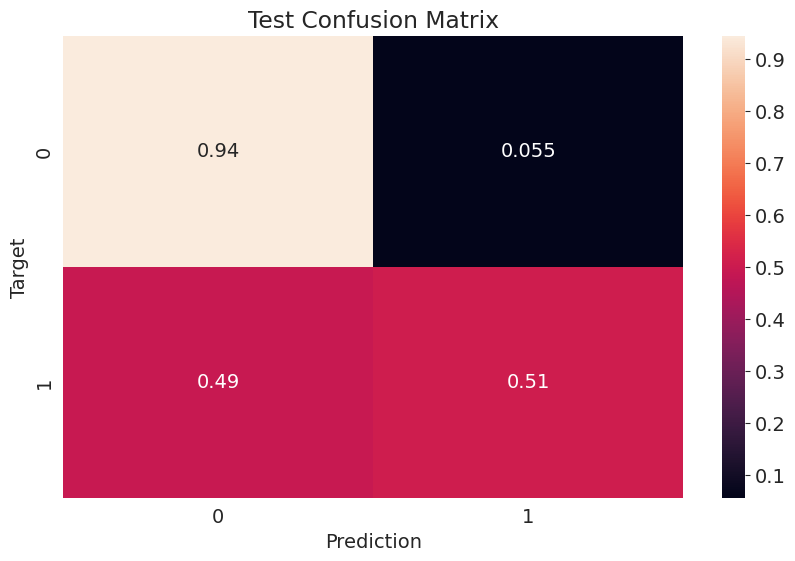

In [87]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')


In [88]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [89]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [90]:
print("Accuracy Score of random guess: " , accuracy_score(test_targets, random_guess(X_test)))
print("Accuracy Score of all no: " , accuracy_score(test_targets, all_no(X_test)))

Accuracy Score of random guess:  0.5140928940055578
Accuracy Score of all no:  0.7733227471218738


In [91]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [92]:
new_input = {'Date': '2021-06-19',
             'Location': 'Uluru',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [93]:
predict_input(new_input)


<ipython-input-91-bc00b974dee8>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-91-bc00b974dee8>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-91-bc00b974dee8>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-91-bc00b974dee8>:5: PerformanceWarning:

Da

('Yes', 0.8454166569538724)

In [94]:
import joblib


In [95]:

weather_forecaste = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [96]:
joblib.dump(weather_forecaste, "weather_forecaste.joblib")

['weather_forecaste.joblib']

In [97]:
todays_weather = joblib.load("weather_forecaste.joblib")


In [98]:
test_preds2 = todays_weather['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)


0.8455736403334657

In [99]:
import opendatasets as od
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Download the dataset
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# Create training, validation and test sets
year = pd.to_datetime(raw_df.Date).dt.year
train_df, val_df, test_df = raw_df[year < 2015], raw_df[year == 2015], raw_df[year > 2015]

# Create inputs and targets
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

# Impute missing numerical values
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

# Scale numeric features
scaler = MinMaxScaler().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

# Save processed data to disk
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

# Load processed data from disk
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')
train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

<ipython-input-99-8f2410176b28>:42: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-99-8f2410176b28>:42: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-99-8f2410176b28>:42: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the resul

Accuracy: 85.41%
Accuracy: 84.25%


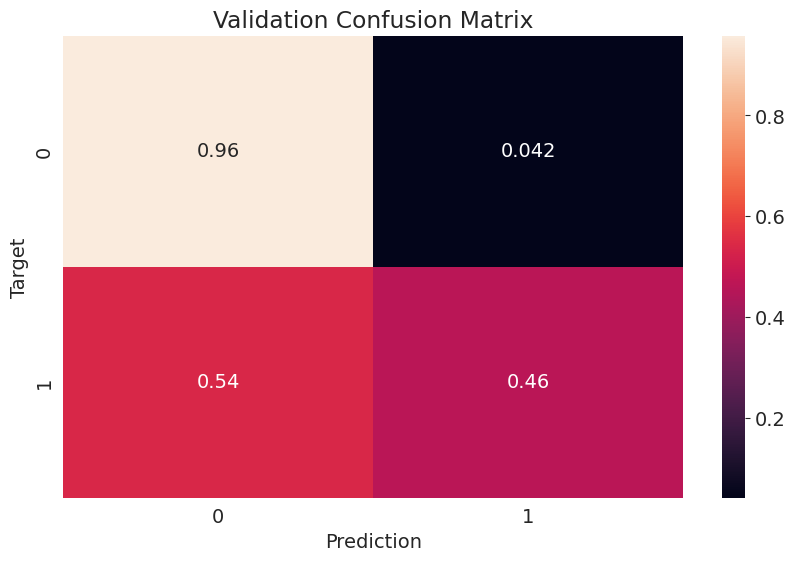

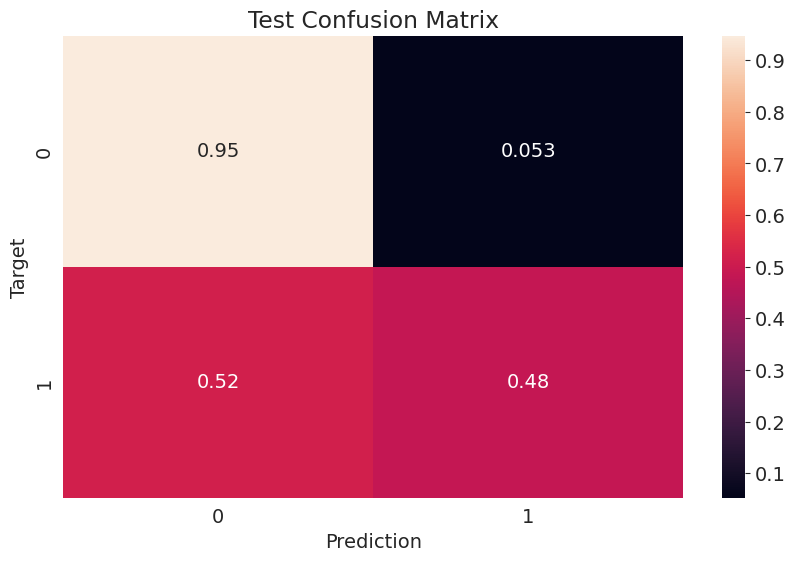

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Select the columns to be used for training/prediction
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# Create and train the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

# Generate predictions and probabilities
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)
accuracy_score(train_targets, train_preds)

# Helper function to predict, compute accuracy & plot confustion matrix
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return preds

# Evaluate on validation and test set
val_preds = predict_and_plot(X_val, val_targets, 'Validation')
test_preds = predict_and_plot(X_test, test_targets, 'Test')

# Save the trained model & load it back
aussie_rain = {'model': model, 'imputer': imputer, 'scaler': scaler, 'encoder': encoder,
               'input_cols': input_cols, 'target_col': target_col, 'numeric_cols': numeric_cols,
               'categorical_cols': categorical_cols, 'encoded_cols': encoded_cols}
joblib.dump(aussie_rain, 'aussie_rain.joblib')
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [101]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

predict_input(new_input)

<ipython-input-101-3cf2bb9907bf>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-101-3cf2bb9907bf>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-101-3cf2bb9907bf>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-101-3cf2bb9907bf>:5: PerformanceWarning:

('Yes', 0.6316578504898855)